**Mounting drive**

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Loading dataset**

In [13]:
fldr = "/content/drive/MyDrive/ML Project(Age & Gender Prediction)/UTKFace"

In [14]:
import os
files=os.listdir(fldr)

In [15]:
import cv2
ages=[]
genders=[]
images=[]

for fle in files:
  age=int(fle.split('_')[0])
  gender=int(fle.split('_')[1])
  total=fldr+'/'+fle
  print(total)
  image=cv2.imread(total)

  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image= cv2.resize(image,(48,48))
  images.append(image)

/content/drive/MyDrive/ML Project(Age & Gender Prediction)/UTKFace/19_0_1_20170117193231107.jpg.chip.jpg
/content/drive/MyDrive/ML Project(Age & Gender Prediction)/UTKFace/19_0_2_20170105183427303.jpg.chip.jpg
/content/drive/MyDrive/ML Project(Age & Gender Prediction)/UTKFace/19_0_0_20170119150054894.jpg.chip.jpg
/content/drive/MyDrive/ML Project(Age & Gender Prediction)/UTKFace/19_0_1_20170116210354987.jpg.chip.jpg
/content/drive/MyDrive/ML Project(Age & Gender Prediction)/UTKFace/18_1_0_20170109214239711.jpg.chip.jpg
/content/drive/MyDrive/ML Project(Age & Gender Prediction)/UTKFace/19_0_1_20170113193315725.jpg.chip.jpg
/content/drive/MyDrive/ML Project(Age & Gender Prediction)/UTKFace/19_0_2_20170104020121132.jpg.chip.jpg
/content/drive/MyDrive/ML Project(Age & Gender Prediction)/UTKFace/19_0_0_20170120133526566.jpg.chip.jpg
/content/drive/MyDrive/ML Project(Age & Gender Prediction)/UTKFace/19_0_1_20170113132630232.jpg.chip.jpg
/content/drive/MyDrive/ML Project(Age & Gender Predicti

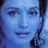

In [16]:
from google.colab.patches import cv2_imshow
cv2_imshow(images[53])

In [17]:
for fle in files:
  age=int(fle.split('_')[0])
  gender=int(fle.split('_')[1])
  ages.append(age)
  genders.append(gender)

In [18]:
import numpy as np
images_f=np.array(images)
genders_f=np.array(genders)
ages_f=np.array(ages)

In [19]:
np.save(fldr+'image.npy',images_f)
np.save(fldr+'gender.npy',genders_f)
np.save(fldr+'age.npy',ages_f)

In [20]:
values, counts = np.unique(genders_f, return_counts=True)
print(counts)

[127 173]


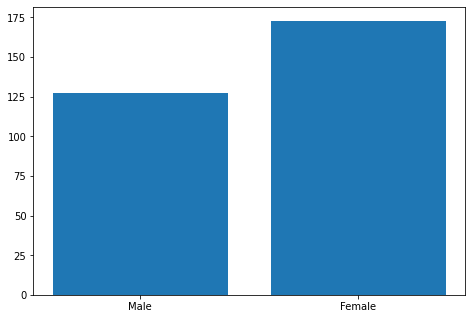

In [21]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
gender = ['Male', 'Female']
values=[127,173]
ax.bar(gender,values)
plt.show()

In [22]:
values, counts = np.unique(ages_f, return_counts=True)
print(counts)

[ 5 15 60 10 46 24 17 20 10 34 18 41]


In [23]:
val=values.tolist()
cnt=counts.tolist()

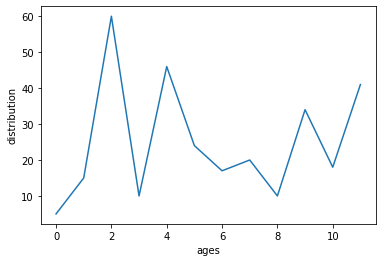

In [24]:
plt.plot(counts)
plt.xlabel('ages')
plt.ylabel('distribution')
plt.show()

In [25]:
labels=[]

i=0
while i<len(ages):
  label=[]
  label.append([ages[i]])
  label.append([genders[i]])
  labels.append(label)
  i+=1

In [26]:
images_f_2=images_f/255

In [27]:
labels_f=np.array(labels)

In [28]:
images_f_2.shape

(300, 48, 48, 3)

In [29]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, Y_train, Y_test= train_test_split(images_f_2, labels_f,test_size=0.25)


In [31]:
Y_train[0:5]


array([[[25],
        [ 1]],

       [[86],
        [ 0]],

       [[88],
        [ 1]],

       [[61],
        [ 0]],

       [[18],
        [ 1]]])

In [32]:
Y_train_2=[Y_train[:,1],Y_train[:,0]]
Y_test_2=[Y_test[:,1],Y_test[:,0]]

In [34]:
Y_train_2[0][0:5]

array([[1],
       [0],
       [1],
       [0],
       [1]])

In [35]:
Y_train_2[1][0:5]


array([[25],
       [86],
       [88],
       [61],
       [18]])

In [36]:
print("No of training examples = "+str(X_train.shape[0]))
print("No of test examples = "+ str(X_test.shape[0]) )
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test (dev) shape: " + str(X_test.shape))
print ("Y_test (dev) shape: " + str(Y_test.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

No of training examples = 225
No of test examples = 75
X_train shape: (225, 48, 48, 3)
Y_train shape: (225, 2, 1)
X_test (dev) shape: (75, 48, 48, 3)
Y_test (dev) shape: (75, 2, 1)
X_test shape: (75, 48, 48, 3)
Y_test shape: (75, 2, 1)


**Model Training**

In [37]:
import keras 
from keras.layers import *
from keras.models import *
from keras import backend as K

In [38]:
inputs = Input(shape=(48,48,3))
conv1 = Conv2D(32, kernel_size=(3, 3),activation='relu')(inputs)
conv2 = Conv2D(64, kernel_size=(3, 3),activation='relu')(conv1)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv2)
conv3 = Conv2D(128, kernel_size=(3, 3),activation='relu')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv3)
x = Dropout(0.25)(pool2)
flat = Flatten()(x)

dropout = Dropout(0.5)
gender_model = Dense(128, activation='relu')(flat)
gender_model = dropout(gender_model)
gender_model = Dense(64, activation='relu')(gender_model)
gender_model = dropout(gender_model)
gender_model = Dense(32, activation='relu')(gender_model)
gender_model = dropout(gender_model)
gender_model = Dense(16, activation='relu')(gender_model)
gender_model = dropout(gender_model)
gender_model = Dense(8, activation='relu')(gender_model)
gender_model = dropout(gender_model)
gender_model = Dense(1, activation='sigmoid')(gender_model)

In [39]:
model = Model(inputs=inputs, outputs=[gender_model])
model.compile(optimizer = 'adam', loss =['mse','binary_crossentropy'],metrics=['accuracy'])

In [40]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 48, 48, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 46, 46, 32)   896         input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 44, 44, 64)   18496       conv2d_3[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_2 (MaxPooling2D)  (None, 22, 22, 64)   0           conv2d_4[0][0]                   
____________________________________________________________________________________________

In [52]:
h = model.fit(X_train, Y_train_2, epochs = 500, batch_size=64,shuffle = True)



Epoch 1/500
4/4 [==============================] - 0s 17ms/step - loss: 0.4031 - accuracy: 0.5867
Epoch 2/500
4/4 [==============================] - 0s 16ms/step - loss: 0.4002 - accuracy: 0.5911
Epoch 3/500
4/4 [==============================] - 0s 16ms/step - loss: 0.4034 - accuracy: 0.5822
Epoch 4/500
4/4 [==============================] - 0s 13ms/step - loss: 0.4137 - accuracy: 0.5822
Epoch 5/500
4/4 [==============================] - 0s 14ms/step - loss: 0.4012 - accuracy: 0.5867
Epoch 6/500
4/4 [==============================] - 0s 14ms/step - loss: 0.4096 - accuracy: 0.5911
Epoch 7/500
4/4 [==============================] - 0s 12ms/step - loss: 0.4114 - accuracy: 0.5822
Epoch 8/500
4/4 [==============================] - 0s 12ms/step - loss: 0.3910 - accuracy: 0.5911
Epoch 9/500
4/4 [==============================] - 0s 12ms/step - loss: 0.4065 - accuracy: 0.5778
Epoch 10/500
4/4 [==============================] - 0s 13ms/step - loss: 0.3795 - accuracy: 0.6000
Epoch 11/500
4/4 [=

In [54]:
loss, acc = model.evaluate(X_test,Y_test_2,verbose=0)
print('Test loss: {}'.format(loss))
print('Test Accuracy: {}'.format(acc))

Test loss: 0.4533333480358124
Test Accuracy: 0.54666668176651


In [53]:
loss, acc = model.evaluate(X_train,Y_train_2,verbose=0)
print('Train loss: {}'.format(loss))
print('Train Accuracy: {}'.format(acc))

Train loss: 0.41333332657814026
Train Accuracy: 0.5866666436195374


In [55]:
model.save('data.h5')

In [61]:
import plotly.express as px
fig = px.line(
    history.history, y=['loss', 'val_loss'],
    labels={'index': 'epoch', 'value': 'loss'}, 
    title='Training History')
fig.show()

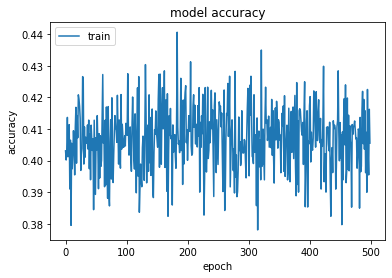

In [59]:
history = h
plt.plot(history.history['loss'])
#plt.plot(history.history[''])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
#@title Age
def display(img):
    plt.imshow(img[:,:,0])
    plt.set_cmap('gray')
    plt.show()
    
def age_group(age):
    if age >=0 and age < 18:
        return 1
    elif age < 30:
        return 2
    elif age < 80:
        return 3
    else:
        return 4

def get_age(distr):
    distr = distr*4
    if distr >= 0.65 and distr <= 1.4:return "0-18"
    if distr >= 1.65 and distr <= 2.4:return "19-30"
    if distr >= 2.65 and distr <= 3.4:return "31-80"
    if distr >= 3.65 and distr <= 4.4:return "80 +"
    return "Unknown"
    
def get_gender(prob):
    if prob < 0.5:return "Male"
    else: return "Female"

def get_result(sample):
    sample = sample/255
    val = model.predict( np.array([ sample ]) )    
    age = get_age(val[0])
    gender = get_gender(val[1])
    print("Values:",val,"\nPredicted Gender:",gender,"Predicted Age:",age)
    
    
indexes = [59,80,2,7,9,225,45]
for idx in indexes:
    sample = images[idx]
    display(sample)
    print("Actual Gender:",get_gender(genders[idx]),"Age:",ages[idx])
    res = get_result(sample)